In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Fraud.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [11]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [13]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [17]:
df = df.drop(['nameOrig', 'nameDest'], axis = 1)

In [19]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [21]:
column_to_move = df.pop("isFraud")
df.insert(8, "isFraud", column_to_move)

In [23]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [29]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,0,1
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [27]:
X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

In [31]:
print(X)

[[1.00000000e+00 3.00000000e+00 9.83964000e+03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 3.00000000e+00 1.86428000e+03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 4.00000000e+00 1.81000000e+02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [7.43000000e+02 1.00000000e+00 6.31140928e+06 ... 6.84888400e+04
  6.37989811e+06 0.00000000e+00]
 [7.43000000e+02 4.00000000e+00 8.50002520e+05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.43000000e+02 1.00000000e+00 8.50002520e+05 ... 6.51009911e+06
  7.36010163e+06 0.00000000e+00]]


In [33]:
print(y)

[0 0 1 ... 1 1 1]


In [37]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print(f"Original dataset shape: {Counter(y)}")

Original dataset shape: Counter({0: 6354407, 1: 8213})


In [39]:
rus = RandomUnderSampler(random_state = 42)
X_res, y_res = rus.fit_resample(X, y)

In [41]:
print(f"Resampled dataset shape: {Counter(y_res)}")

Resampled dataset shape: Counter({0: 8213, 1: 8213})


In [97]:
resampled_data = pd.DataFrame(X_res, columns= ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud'])
resampled_data['isFraud'] = y_res

In [99]:
resampled_data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,162.0,1.0,183806.32,19391.00,0.00,382572.19,566378.51,0.0,0
1,137.0,3.0,521.37,0.00,0.00,0.00,0.00,0.0,0
2,179.0,3.0,3478.18,19853.00,16374.82,0.00,0.00,0.0,0
3,355.0,3.0,1716.05,5769.17,4053.13,0.00,0.00,0.0,0
4,354.0,0.0,253129.93,1328499.49,1581629.42,2713220.48,2460090.55,0.0,0


In [101]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
model = RandomForestClassifier(random_state=42)
model.fit(X_res, y_res)

RandomForestClassifier(random_state=42)

In [105]:
importances = model.feature_importances_
features = ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']

In [107]:
print(len(features))
print(len(importances))

8
8


In [109]:
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

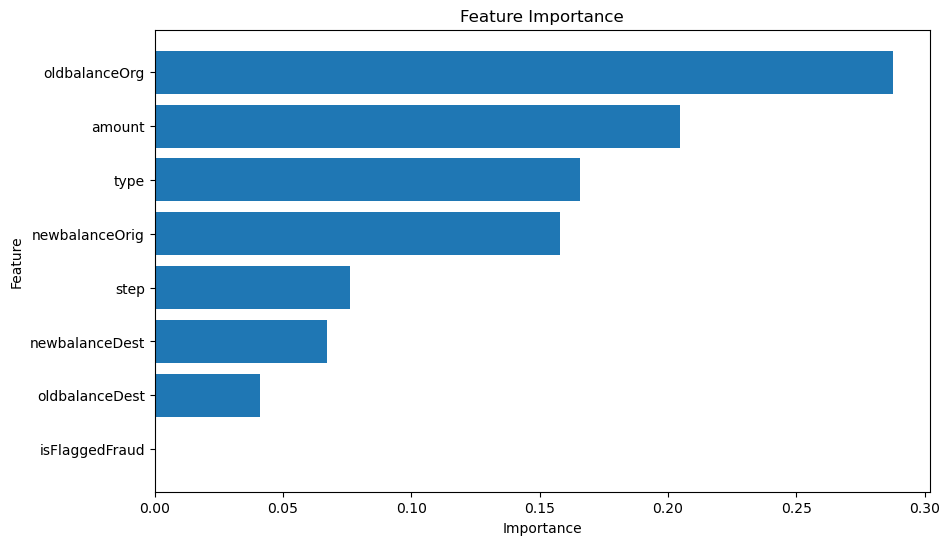

In [111]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.25, random_state = 0)

In [115]:
print(X_train)

[[2.53000000e+02 3.00000000e+00 7.47170000e+02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.54000000e+02 4.00000000e+00 6.65500000e+04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.51000000e+02 1.00000000e+00 9.56145500e+04 ... 1.44556144e+06
  1.54117599e+06 0.00000000e+00]
 ...
 [1.45000000e+02 4.00000000e+00 1.76788602e+06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.30000000e+02 4.00000000e+00 1.00000000e+07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.34000000e+02 1.00000000e+00 1.37699280e+05 ... 0.00000000e+00
  1.37699280e+05 0.00000000e+00]]


In [117]:
print(y_train)

[0 1 0 ... 1 1 0]


In [119]:
print(X_test)

[[3.13000000e+02 1.00000000e+00 5.81886313e+06 ... 2.27196790e+05
  6.04605992e+06 0.00000000e+00]
 [4.49000000e+02 4.00000000e+00 1.33632240e+05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.07000000e+02 1.00000000e+00 1.86887270e+05 ... 2.93033130e+05
  4.79920400e+05 0.00000000e+00]
 ...
 [3.79000000e+02 3.00000000e+00 1.35720200e+04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.57000000e+02 1.00000000e+00 2.54778990e+05 ... 6.98370790e+05
  9.53149780e+05 0.00000000e+00]
 [3.70000000e+02 3.00000000e+00 2.51020200e+04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [121]:
print(y_test)

[1 1 0 ... 0 0 0]


In [123]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [125]:
print(X_train)

[[-0.27244322  0.62186811 -0.44085381 ... -0.26240044 -0.3499406
  -0.03491584]
 [ 0.24968793  1.29712533 -0.40557447 ... -0.26240044 -0.3499406
  -0.03491584]
 [-0.28278245 -0.72864634 -0.38999188 ...  0.19649616  0.07980103
  -0.03491584]
 ...
 [-0.83076168  1.29712533  0.50657506 ... -0.26240044 -0.3499406
  -0.03491584]
 [-0.39134437  1.29712533  4.92011759 ... -0.26240044 -0.3499406
  -0.03491584]
 [-0.37066591 -0.72864634 -0.36742869 ... -0.26240044 -0.31154452
  -0.03491584]]


In [127]:
print(X_test)

[[ 0.0377337  -0.72864634  2.67845458 ... -0.19027633  1.33594321
  -0.03491584]
 [ 0.74080139  1.29712533 -0.36960918 ... -0.26240044 -0.3499406
  -0.03491584]
 [ 0.00671601 -0.72864634 -0.34105718 ... -0.16937644 -0.21611956
  -0.03491584]
 ...
 [ 0.37892832  0.62186811 -0.43397793 ... -0.26240044 -0.3499406
  -0.03491584]
 [-0.25176476 -0.72864634 -0.3046579  ... -0.04070113 -0.08416424
  -0.03491584]
 [ 0.33240178  0.62186811 -0.42779627 ... -0.26240044 -0.3499406
  -0.03491584]]


In [129]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_df = pd.DataFrame(X_train, columns=['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud'])  

X_with_const = sm.add_constant(X_train_df)

print(X_with_const.columns)

Index(['const', 'step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud'],
      dtype='object')


In [131]:
X_train_df = pd.DataFrame(X_train, columns=['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']) 

X_with_const = sm.add_constant(X_train_df)

vif = pd.DataFrame()
vif['Feature'] = X_with_const.columns
vif['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

print(vif)

          Feature        VIF
0           const   1.000000
1            step   1.037608
2            type   1.247858
3          amount  19.902658
4   oldbalanceOrg  50.044415
5  newbalanceOrig  29.726831
6  oldbalanceDest  12.210835
7  newbalanceDest  14.158615
8  isFlaggedFraud   1.150992


In [133]:
variance = X_train_df.var()
print(variance)

step              1.000081
type              1.000081
amount            1.000081
oldbalanceOrg     1.000081
newbalanceOrig    1.000081
oldbalanceDest    1.000081
newbalanceDest    1.000081
isFlaggedFraud    1.000081
dtype: float64


In [135]:
X_train_df_non_constant = X_train_df.loc[:, X_train_df.var() > 0]
X_with_const_non_constant = sm.add_constant(X_train_df_non_constant)

In [137]:
features_to_keep = ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceDest']
X_train_df_filtered = X_train_df[features_to_keep]

X_with_const_filtered = sm.add_constant(X_train_df_filtered)

vif_filtered = pd.DataFrame()
vif_filtered['Feature'] = X_with_const_filtered.columns
vif_filtered['VIF'] = [variance_inflation_factor(X_with_const_filtered.values, i) for i in range(X_with_const_filtered.shape[1])]

print(vif_filtered)

          Feature       VIF
0           const  1.000000
1            step  1.029678
2            type  1.128328
3          amount  1.988057
4   oldbalanceOrg  1.783185
5  newbalanceDest  1.162222


In [139]:
X_train = np.delete(X_train, [4, 5], axis=1)
X_test = np.delete(X_test, [4, 5], axis=1)

In [141]:
print(X_train[:5])

[[-0.27244322  0.62186811 -0.44085381 -0.35419639 -0.3499406  -0.03491584]
 [ 0.24968793  1.29712533 -0.40557447 -0.36745025 -0.3499406  -0.03491584]
 [-0.28278245 -0.72864634 -0.38999188 -0.38832803  0.07980103 -0.03491584]
 [-0.32413937  1.29712533  0.09258308 -0.07595799 -0.3499406  -0.03491584]
 [ 1.14920101  1.29712533  0.72396869  0.29349144 -0.3499406  -0.03491584]]


In [145]:
from xgboost import XGBClassifier 

classifier = XGBClassifier()
classifier.fit(X_train, y_train) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [147]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

y_pred = classifier.predict(X_test)

In [149]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.2f}")
print(f"Test Precision: {precision:.2f}")
print(f"Test Recall: {recall:.2f}")
print(f"Test F1 Score: {f1:.2f}")

Test Accuracy: 0.99
Test Precision: 0.98
Test Recall: 0.99
Test F1 Score: 0.99


In [191]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Test Set):\n", cm)

Confusion Matrix (Test Set):
 [[1993   42]
 [  12 2060]]


In [153]:
y_train_pred = classifier.predict(X_train)

In [155]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print(f"Training F1 Score: {train_f1:.2f}")

Training Accuracy: 1.00
Training Precision: 1.00
Training Recall: 1.00
Training F1 Score: 1.00


In [157]:
train_cm = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Training Set):\n", train_cm)

Confusion Matrix (Training Set):
 [[6164   14]
 [   6 6135]]


In [161]:
from sklearn.metrics import classification_report

print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred))

print("Classification Report for Test Data:")
print(classification_report(y_test, y_pred))

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6178
           1       1.00      1.00      1.00      6141

    accuracy                           1.00     12319
   macro avg       1.00      1.00      1.00     12319
weighted avg       1.00      1.00      1.00     12319

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2035
           1       0.98      0.99      0.99      2072

    accuracy                           0.99      4107
   macro avg       0.99      0.99      0.99      4107
weighted avg       0.99      0.99      0.99      4107



In [183]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier, X_res, y_res, cv=5)

print(f'Cross-validation scores: {scores}')
print(f'Mean accuracy: {scores.mean()}')
print(f'Standard deviation: {scores.std()}')

Cross-validation scores: [0.72398052 0.8718417  0.92694064 0.99238965 0.99543379]
Mean accuracy: 0.9021172614597605
Standard deviation: 0.10012251042206585


In [187]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [6, 9],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_res, y_res)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 150, 'subsample': 0.8}
Best cross-validation score: 0.87


In [189]:
best_params = grid_search.best_params_
final_model = XGBClassifier(colsample_bytree = 1.0, learning_rate = 0.2, max_depth = 6, n_estimators = 150, subsample = 0.8)

final_model.fit(X_train, y_train)

test_score = final_model.score(X_test, y_test)
print("Test set score: {:.2f}".format(test_score))

Test set score: 0.99


In [197]:
y_pred_final = final_model.predict(X_test)

In [199]:
accuracy = accuracy_score(y_test, y_pred_final)
precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final)

print(f"Test Accuracy: {accuracy:.2f}")
print(f"Test Precision: {precision:.2f}")
print(f"Test Recall: {recall:.2f}")
print(f"Test F1 Score: {f1:.2f}")

Test Accuracy: 0.99
Test Precision: 0.98
Test Recall: 0.99
Test F1 Score: 0.99


In [203]:
cm = confusion_matrix(y_test, y_pred_final)
print("Confusion Matrix (Test Set):\n", cm)

Confusion Matrix (Test Set):
 [[1996   39]
 [  12 2060]]


In [207]:
y_train_pred_final = final_model.predict(X_train)

In [209]:
train_accuracy = accuracy_score(y_train, y_train_pred_final)
train_precision = precision_score(y_train, y_train_pred_final)
train_recall = recall_score(y_train, y_train_pred_final)
train_f1 = f1_score(y_train, y_train_pred_final)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print(f"Training F1 Score: {train_f1:.2f}")

Training Accuracy: 1.00
Training Precision: 1.00
Training Recall: 1.00
Training F1 Score: 1.00


In [211]:
train_cm = confusion_matrix(y_train, y_train_pred_final)
print("Confusion Matrix (Training Set):\n", train_cm)

Confusion Matrix (Training Set):
 [[6173    5]
 [   3 6138]]


In [213]:
print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred_final))

print("Classification Report for Test Data:")
print(classification_report(y_test, y_pred_final))

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6178
           1       1.00      1.00      1.00      6141

    accuracy                           1.00     12319
   macro avg       1.00      1.00      1.00     12319
weighted avg       1.00      1.00      1.00     12319

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2035
           1       0.98      0.99      0.99      2072

    accuracy                           0.99      4107
   macro avg       0.99      0.99      0.99      4107
weighted avg       0.99      0.99      0.99      4107



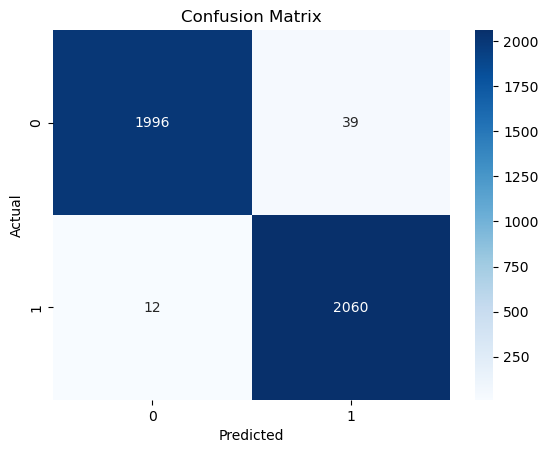

In [215]:
cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

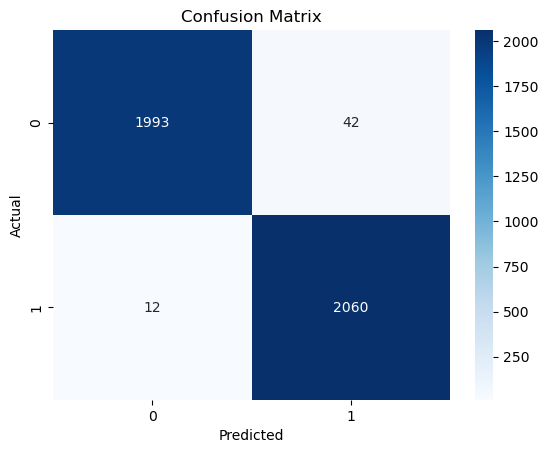

In [163]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

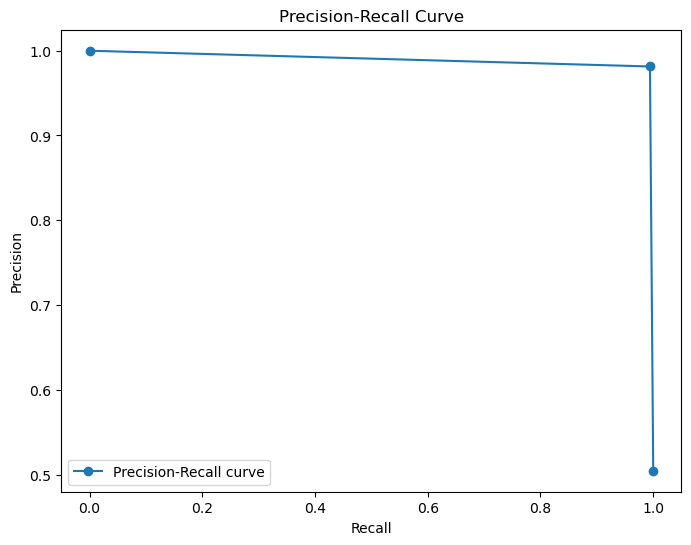

Average Precision Score: 0.98


In [217]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_final)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='o', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

avg_precision = average_precision_score(y_test, y_pred_final)
print(f'Average Precision Score: {avg_precision:.2f}')

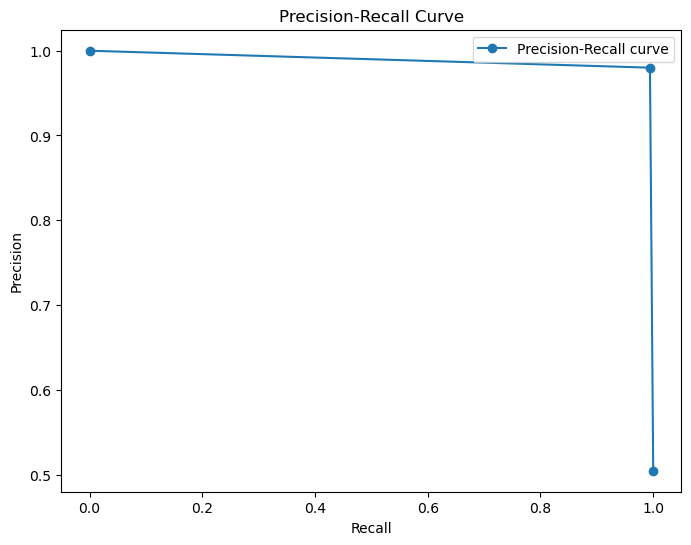

Average Precision Score: 0.98


In [165]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='o', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

avg_precision = average_precision_score(y_test, y_pred)
print(f'Average Precision Score: {avg_precision:.2f}')